# Exploration of the dataset

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = yf.download(tickers=["AAPL"], period="5y", interval="1d", auto_adjust=True)
data.columns = data.columns.droplevel(1)
print(data.shape)
print(data.columns)
data.head()

In [ ]:
if data.isnull().values.any():
    data = data.dropna()

print(f"Mean: {data.Close.mean():.2f}")
print(f"Standard Deviation: {data.Close.std():.2f}")
print(f"Min: {data.Close.min():.2f}")
print(f"Max: {data.Close.max():.2f}")

In [ ]:
# Close prices for the entire period
plt.figure(figsize=[14,7])
plt.plot(data.Close)
plt.grid()
plt.legend(["Close Price"])
plt.title("AAPL Close Price")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.show()

In [ ]:
# Candlestick chart
plt.figure(figsize=[14,7])

# Filter to last 3 months for readability
data_recent = data.tail(63)

up = data_recent[data_recent.Close >= data_recent.Open]
down = data_recent[data_recent.Close < data_recent.Open]

col_up = "green"
col_down = "red"
width_body = 0.8
width_wick = 0.1

# Plotting up prices
plt.bar(up.index, up.Close-up.Open, width_body, bottom=up.Open, color=col_up)
plt.bar(up.index, up.High-up.Close, width_wick, bottom=up.Close, color=col_up)
plt.bar(up.index, up.Low-up.Open, width_wick, bottom=up.Open, color=col_up)

# Plotting down prices
plt.bar(down.index, down.Close-down.Open, width_body, bottom=down.Open, color=col_down)
plt.bar(down.index, down.High-down.Open, width_wick, bottom=down.Open, color=col_down)
plt.bar(down.index, down.Low-down.Close, width_wick, bottom=down.Close, color=col_down)

plt.title("AAPL Candlestick Chart (Last 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Derived calculations

# Filter to last 30 days of trading
data_recent = data.tail(30)
daily_yield = data_recent["Close"].pct_change()

plt.figure(figsize=[14,7])
plt.plot(daily_yield*100)
plt.axhline(y=daily_yield.mean()*100, color="r", linestyle="--", label=f"Mean: {daily_yield.mean()*100:.2f}%")
plt.legend()
plt.title("AAPL variation in 30-days")
plt.xlabel("Day")
plt.ylabel("% variation")
plt.grid(alpha=0.3)
plt.show()

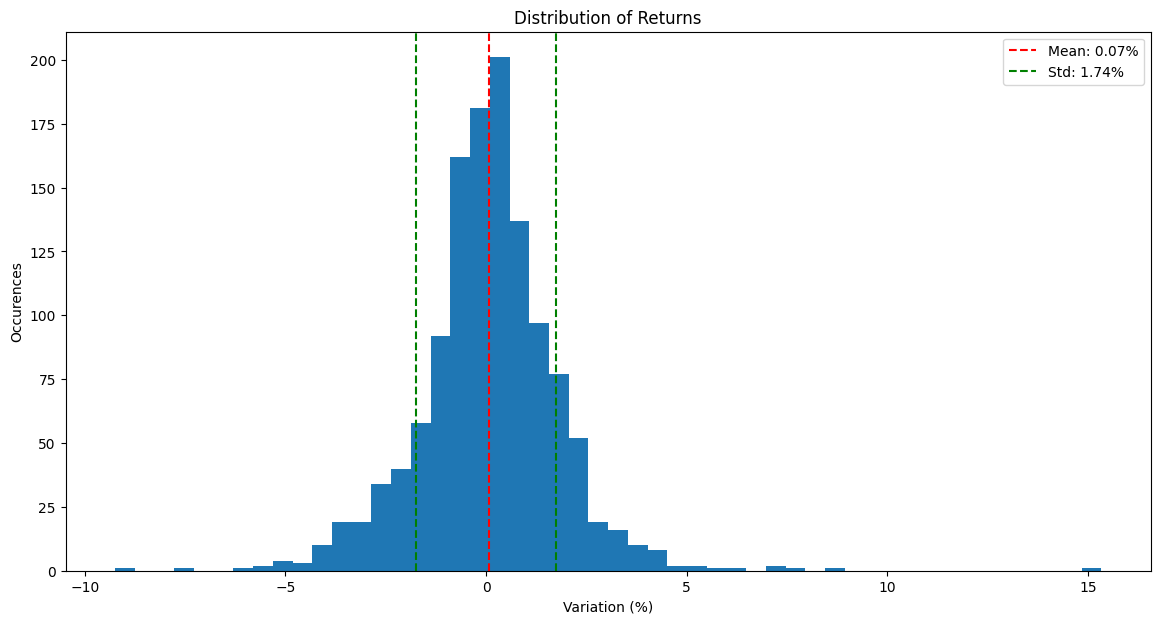

In [179]:
# Distributed yield

# Filter to last 30 days of trading
daily_yield = data["Close"].pct_change()

plt.figure(figsize=[14,7])
plt.hist(daily_yield*100, bins=50)
plt.axvline(x=daily_yield.mean()*100, color='r', linestyle='--', label=f'Mean: {daily_yield.mean()*100:.2f}%')
plt.axvline(x=daily_yield.std()*100, color='g', linestyle='--', label=f'Std: {daily_yield.std()*100:.2f}%')
plt.axvline(x=-daily_yield.std()*100, color='g', linestyle='--')
plt.legend()
plt.title("Distribution of Returns")
plt.xlabel("Variation (%)")
plt.ylabel("Occurences")
plt.show()